### 1. <a id='importation'>Détail des données fournies</a>

In [314]:
import time
import warnings

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

# Ignorer les avertissements
warnings.filterwarnings('ignore')
path = "../data/"

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement et initialisation des données</a>

In [315]:
#On vient charger les différents dataset
employee_df = pd.read_csv(path + "employee_survey_data.csv")
general_df = pd.read_csv(path + "general_data.csv")
manager_df = pd.read_csv(path + "manager_survey_data.csv")
in_time_df = pd.read_csv(path + "in_time.csv")
out_time_df = pd.read_csv(path + "out_time.csv")

dataframes = [
    ("employee_df", employee_df),
    ("general_df", general_df),
    ("manager_df", manager_df),
    ("in_time_df", in_time_df),
    ("out_time_df", out_time_df)
]

for name, df in dataframes:
    print(DELIMITER)
    print(f"Nom du DataFrame : {name}")
    print(f"Description : {df.describe()}")
    print(f"Valeurs nulles : ")
    print(f"{df.isnull().sum()}")


--------------------------------
Nom du DataFrame : employee_df
Description :        EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
count   4410.0000                4385.0000        4390.0000        4372.0000
mean    2205.5000                   2.7236           2.7282           2.7614
std     1273.2017                   1.0928           1.1013           0.7062
min        1.0000                   1.0000           1.0000           1.0000
25%     1103.2500                   2.0000           2.0000           2.0000
50%     2205.5000                   3.0000           3.0000           3.0000
75%     3307.7500                   4.0000           4.0000           3.0000
max     4410.0000                   4.0000           4.0000           4.0000
Valeurs nulles : 
EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64
--------------------------------
Nom du DataFrame : general_df
Description :  

---

Résumé des différentes données présentes dans les dataset:

**Dataset employee_survey_data**
| #  | Colonne                   | Type      | Description                                    | Valeurs manquantes | Moyenne | Médiane | Min | Max |
|----|---------------------------|-----------|-----------------------------------------------|--------------------|---------|---------|-----|-----|
| 1  | EmployeeID                | int64     | Identifiant unique pour chaque employé       | 0                  | -       | -       | -   | -   |
| 2  | EnvironmentSatisfaction   | float64   | Satisfaction par rapport à l’environnement   | 25                 | 2.72    | 3       | 1   | 4   |
| 3  | JobSatisfaction           | float64   | Satisfaction au travail                      | 20                 | 2.73    | 3       | 1   | 4   |
| 4  | WorkLifeBalance           | float64   | Équilibre vie pro/perso                      | 38                 | 2.76    | 3       | 1   | 4   |

**Dataset general_data**
| #  | Colonne                     | Type      | Description                                    | Valeurs manquantes | Moyenne   | Médiane | Min | Max      |
|----|-----------------------------|-----------|-----------------------------------------------|--------------------|-----------|---------|-----|----------|
| 1  | Age                         | int64     | Âge des employés                              | 0                  | 36.92     | 36      | 18  | 60       |
| 2  | Attrition                   | object    | Indique si l'employé a quitté l'entreprise    | 0                  | -         | -       | -   | -        |
| 3  | BusinessTravel              | object    | Fréquence des déplacements professionnels     | 0                  | -         | -       | -   | -        |
| 4  | Department                  | object    | Département auquel l'employé appartient       | 0                  | -         | -       | -   | -        |
| 5  | DistanceFromHome            | int64     | Distance entre domicile et lieu de travail    | 0                  | 9.19      | 7       | 1   | 29       |
| 6  | Education                   | int64     | Niveau d'éducation (1 à 5)                    | 0                  | 2.91      | 3       | 1   | 5        |
| 7  | EducationField              | object    | Domaine d'étude                               | 0                  | -         | -       | -   | -        |
| 8  | EmployeeCount               | int64     | Toujours égal à 1                             | 0                  | 1.0       | 1       | 1   | 1        |
| 9  | EmployeeID                  | int64     | Identifiant unique pour chaque employé        | 0                  | -         | -       | 1   | 4410     |
| 10 | Gender                      | object    | Genre de l'employé                            | 0                  | -         | -       | -   | -        |
| 11 | JobLevel                    | int64     | Niveau de poste (1 à 5)                       | 0                  | 2.06      | 2       | 1   | 5        |
| 12 | JobRole                     | object    | Intitulé du poste                             | 0                  | -         | -       | -   | -        |
| 13 | MaritalStatus               | object    | État civil                                    | 0                  | -         | -       | -   | -        |
| 14 | MonthlyIncome               | int64     | Revenu mensuel (en dollars)                  | 0                  | 65,029    | 49,190  | 10,090 | 199,990 |
| 15 | NumCompaniesWorked          | float64   | Nombre d'entreprises où l'employé a travaillé| 19                 | 2.69      | 2       | 0   | 9        |
| 16 | Over18                      | object    | Toujours "Y"                                | 0                  | -         | -       | -   | -        |
| 17 | PercentSalaryHike           | int64     | Augmentation de salaire en %                  | 0                  | 15.21     | 14      | 11  | 25       |
| 18 | StandardHours               | int64     | Toujours égal à 8                             | 0                  | 8.0       | 8       | 8   | 8        |
| 19 | StockOptionLevel            | int64     | Niveau d'options sur actions (0 à 3)         | 0                  | 0.79      | 1       | 0   | 3        |
| 20 | TotalWorkingYears           | float64   | Années totales d'expérience                  | 9                  | 11.28     | 10      | 0   | 40       |
| 21 | TrainingTimesLastYear       | int64     | Nombre de formations l'année précédente       | 0                  | 2.80      | 3       | 0   | 6        |
| 22 | YearsAtCompany              | int64     | Années passées dans l'entreprise              | 0                  | 7.01      | 5       | 0   | 40       |
| 23 | YearsSinceLastPromotion     | int64     | Années depuis la dernière promotion           | 0                  | 2.19      | 1       | 0   | 15       |
| 24 | YearsWithCurrManager        | int64     | Années passées avec le manager actuel         | 0                  | 4.12      | 3       | 0   | 17       |


**Dataset manager_survey_data**
| #  | Colonne              | Type    | Description                               | Valeurs manquantes | Moyenne | Médiane | Min | Max | Distribution attendue |
|----|----------------------|---------|-------------------------------------------|--------------------|---------|---------|-----|-----|----------------------|
| 1  | EmployeeID          | int64   | Identifiant unique pour chaque employé   | 0                  | -       | -       | -   | -   | Unique, sans répétition |
| 2  | JobInvolvement      | int64   | Implication dans le travail (1 à 4)      | 0                  | 2.73    | 3       | 1   | 4   | Répartition probable autour de 3 |
| 3  | PerformanceRating   | int64   | Évaluation de la performance (3 à 4)     | 0                  | 3.15    | 3       | 3   | 4   | Très concentré sur 3 et 4 |


**Dataset in_time**
| #  | Colonne              | Type    | Description                               | Valeurs manquantes |
|----|----------------------|---------|-------------------------------------------|--------------------|
| 1  | Unnamed: 0          | int64   | Identifiant unique pour chaque employé   | 0                  |
| 2  | 2015-01-01      | float64   | Date d'arrivée      | 4410                  |
| 3  | 2015-01-02   | object   | Date d'arrivée     | 209                  |
| ...  | 2015-31-12   | object   | Date de départ     | 213                  |

**Dataset out_time**
| #  | Colonne              | Type    | Description                               | Valeurs manquantes |
|----|----------------------|---------|-------------------------------------------|--------------------|
| 1  | Unnamed: 0          | int64   | Identifiant unique pour chaque employé   | 0                  |
| 2  | 2015-01-01      | float64   | Date de départ      | 4410                  |
| 3  | 2015-01-02   | object   | Date de départ     | 209                  |
| ...  | 2015-31-12   | object   | Date de départ     | 213                  |

---


### 3. <a id='merge'>Pré-traitements spécifique</a>

Notre objectif est de venir merger ces différents dataset afin de travailler avec un seul DataFrame.
En observant les différentes caractéristiques des dataset, on s'est aperçu qu'on peut dès à présent fusionner tous les dataset sauf "in_time" et "out_time" car les informations présentes sont très différentes des autres dataset, sur la forme ou le fond.
On va donc venir synthétiser ces données afin de récupérer l'heure totale de travail pour chaque employé.


In [316]:
in_time_df = in_time_df.rename(columns={"Unnamed: 0": "EmployeeID"})
out_time_df = out_time_df.rename(columns={"Unnamed: 0": "EmployeeID"})

### Vérifications concernant les 2 dataset :

# Valeurs des EmployeeID
if not in_time_df['EmployeeID'].equals(out_time_df['EmployeeID']):
    print("Les EmployeeID ne correspondent pas entre les dataset : in_time_df et out_time_df")

# Correspondance des valeurs NA
in_time_na = in_time_df.isna()
out_time_na = out_time_df.isna()
if not in_time_na.equals(out_time_na):
    print("Les valeurs NA dans in_time_df et out_time_df ne correspondent pas")

### On est maintenant sûr que les dataset sont conformes et peuvent donc être fusionnés, on va venir convertir les objets en date afin de récuperer les heures totales.

for col in in_time_df.columns[1:]:
    in_time_df[col] = pd.to_datetime(in_time_df[col], errors='coerce')
    out_time_df[col] = pd.to_datetime(out_time_df[col], errors='coerce')

time_difference = out_time_df.iloc[:, 1:] - in_time_df.iloc[:, 1:]

time_difference_in_hours = time_difference.apply(lambda row: row.dt.total_seconds() / 3600, axis=1)
total_hours_per_employee = time_difference_in_hours.sum(axis=1, skipna=True).round(2)

out_time_df["Total_Hours"] = total_hours_per_employee
total_hours_df = out_time_df[["EmployeeID", "Total_Hours"]]
total_hours_df

,EmployeeID,Total_Hours
0,1,1710.6900
1,2,1821.6800
2,3,1697.2000
3,4,1690.5100
4,5,1961.5100
...,...,...
4405,4406,2070.9100
4406,4407,1468.4000
4407,4408,1780.2300
4408,4409,2287.7200


### 3. <a id='merge'>Merge et sauvegarde des datasets</a>

In [317]:
company_df = general_df.merge(employee_df, on='EmployeeID').merge(manager_df, on='EmployeeID').merge(total_hours_df,
                                                                                                     on='EmployeeID')
company_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Total_Hours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0000,4.0000,2.0000,3,3,1710.6900
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0000,2.0000,4.0000,2,4,1821.6800
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0000,2.0000,1.0000,3,3,1697.2000
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0000,4.0000,3.0000,2,3,1690.5100
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0000,1.0000,3.0000,3,3,1961.5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,5,3,0,2,4.0000,1.0000,3.0000,3,3,2070.9100
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,3,0,2,4.0000,4.0000,3.0000,2,3,1468.4000
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,4,4,1,2,1.0000,3.0000,3.0000,3,4,1780.2300
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,2,9,7,8,4.0000,1.0000,3.0000,2,3,2287.7200


---

### 4. <a id='apercu'>Aperçu général</a>

In [318]:
print(f"Nombre de lignes : {company_df.shape[0]}")
print(f"Nombre de colonnes : {company_df.shape[1]}")

Nombre de lignes : 4410
Nombre de colonnes : 30


In [319]:
print("Informations de base :")
company_df.info()

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  N

In [320]:
print(f"Sommaire des statistiques : \n{company_df.describe()}")

Sommaire des statistiques : 
            Age  DistanceFromHome  Education  EmployeeCount  EmployeeID  \
count 4410.0000         4410.0000  4410.0000      4410.0000   4410.0000   
mean    36.9238            9.1925     2.9129         1.0000   2205.5000   
std      9.1333            8.1050     1.0239         0.0000   1273.2017   
min     18.0000            1.0000     1.0000         1.0000      1.0000   
25%     30.0000            2.0000     2.0000         1.0000   1103.2500   
50%     36.0000            7.0000     3.0000         1.0000   2205.5000   
75%     43.0000           14.0000     4.0000         1.0000   3307.7500   
max     60.0000           29.0000     5.0000         1.0000   4410.0000   

       JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count 4410.0000      4410.0000           4391.0000          4410.0000   
mean     2.0639     65029.3129              2.6948            15.2095   
std      1.1067     47068.8886              2.4989             3.6591   
min

Après étude des différentes colonnes, on peut voir que les colonnes `EmployeeCount` et `Over18` et `StandardHours` ne contiennent qu'une seule valeur. On peut donc les supprimer. Le `Gender` est une donnée qui peut susciter de la discrimination, d'un point de vue éthique, on a décidé de la supprimer. L'`EmployeeID` est une colonne unique pour chaque employé, on peut donc la supprimer également.

In [321]:
company_df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID', 'Gender'], axis=1, inplace=True)

Ethique, on a décidé de supprimer la colonne `Gender` qui peut susciter de la discrimination. On a également décidé de modifier la colonne Age afin de la rendre plus anonyme.

In [322]:
def categorize_age(df):
    bins = [0, 25, 35, 45, 55, float('inf')]
    labels = ['<=25', '26-35', '36-45', '46-55', '>56']
    df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
    return df

company_df = categorize_age(company_df)

In [323]:
print("Nombre de valeurs uniques par colonne :")
for column in company_df.columns:
    print(f"- {column} : {company_df[column].nunique()} valeurs uniques")

Nombre de valeurs uniques par colonne :
- Age : 5 valeurs uniques
- Attrition : 2 valeurs uniques
- BusinessTravel : 3 valeurs uniques
- Department : 3 valeurs uniques
- DistanceFromHome : 29 valeurs uniques
- Education : 5 valeurs uniques
- EducationField : 6 valeurs uniques
- JobLevel : 5 valeurs uniques
- JobRole : 9 valeurs uniques
- MaritalStatus : 3 valeurs uniques
- MonthlyIncome : 1349 valeurs uniques
- NumCompaniesWorked : 10 valeurs uniques
- PercentSalaryHike : 15 valeurs uniques
- StockOptionLevel : 4 valeurs uniques
- TotalWorkingYears : 40 valeurs uniques
- TrainingTimesLastYear : 7 valeurs uniques
- YearsAtCompany : 37 valeurs uniques
- YearsSinceLastPromotion : 16 valeurs uniques
- YearsWithCurrManager : 18 valeurs uniques
- EnvironmentSatisfaction : 4 valeurs uniques
- JobSatisfaction : 4 valeurs uniques
- WorkLifeBalance : 4 valeurs uniques
- JobInvolvement : 4 valeurs uniques
- PerformanceRating : 2 valeurs uniques
- Total_Hours : 4300 valeurs uniques


In [324]:
display(company_df.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Total_Hours
0,46-55,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,Married,...,6,1,0,0,3.0000,4.0000,2.0000,3,3,1710.6900
1,26-35,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,Single,...,3,5,1,4,3.0000,2.0000,4.0000,2,4,1821.6800
2,26-35,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,Married,...,2,5,0,3,2.0000,2.0000,1.0000,3,3,1697.2000
3,36-45,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,Married,...,5,8,7,5,4.0000,4.0000,3.0000,2,3,1690.5100
4,26-35,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,Single,...,2,6,0,4,4.0000,1.0000,3.0000,3,3,1961.5100


---

### 5. <a id='missing-check'>Gestion des valeurs manquantes</a>

Valeurs manquantes par colonne :
NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


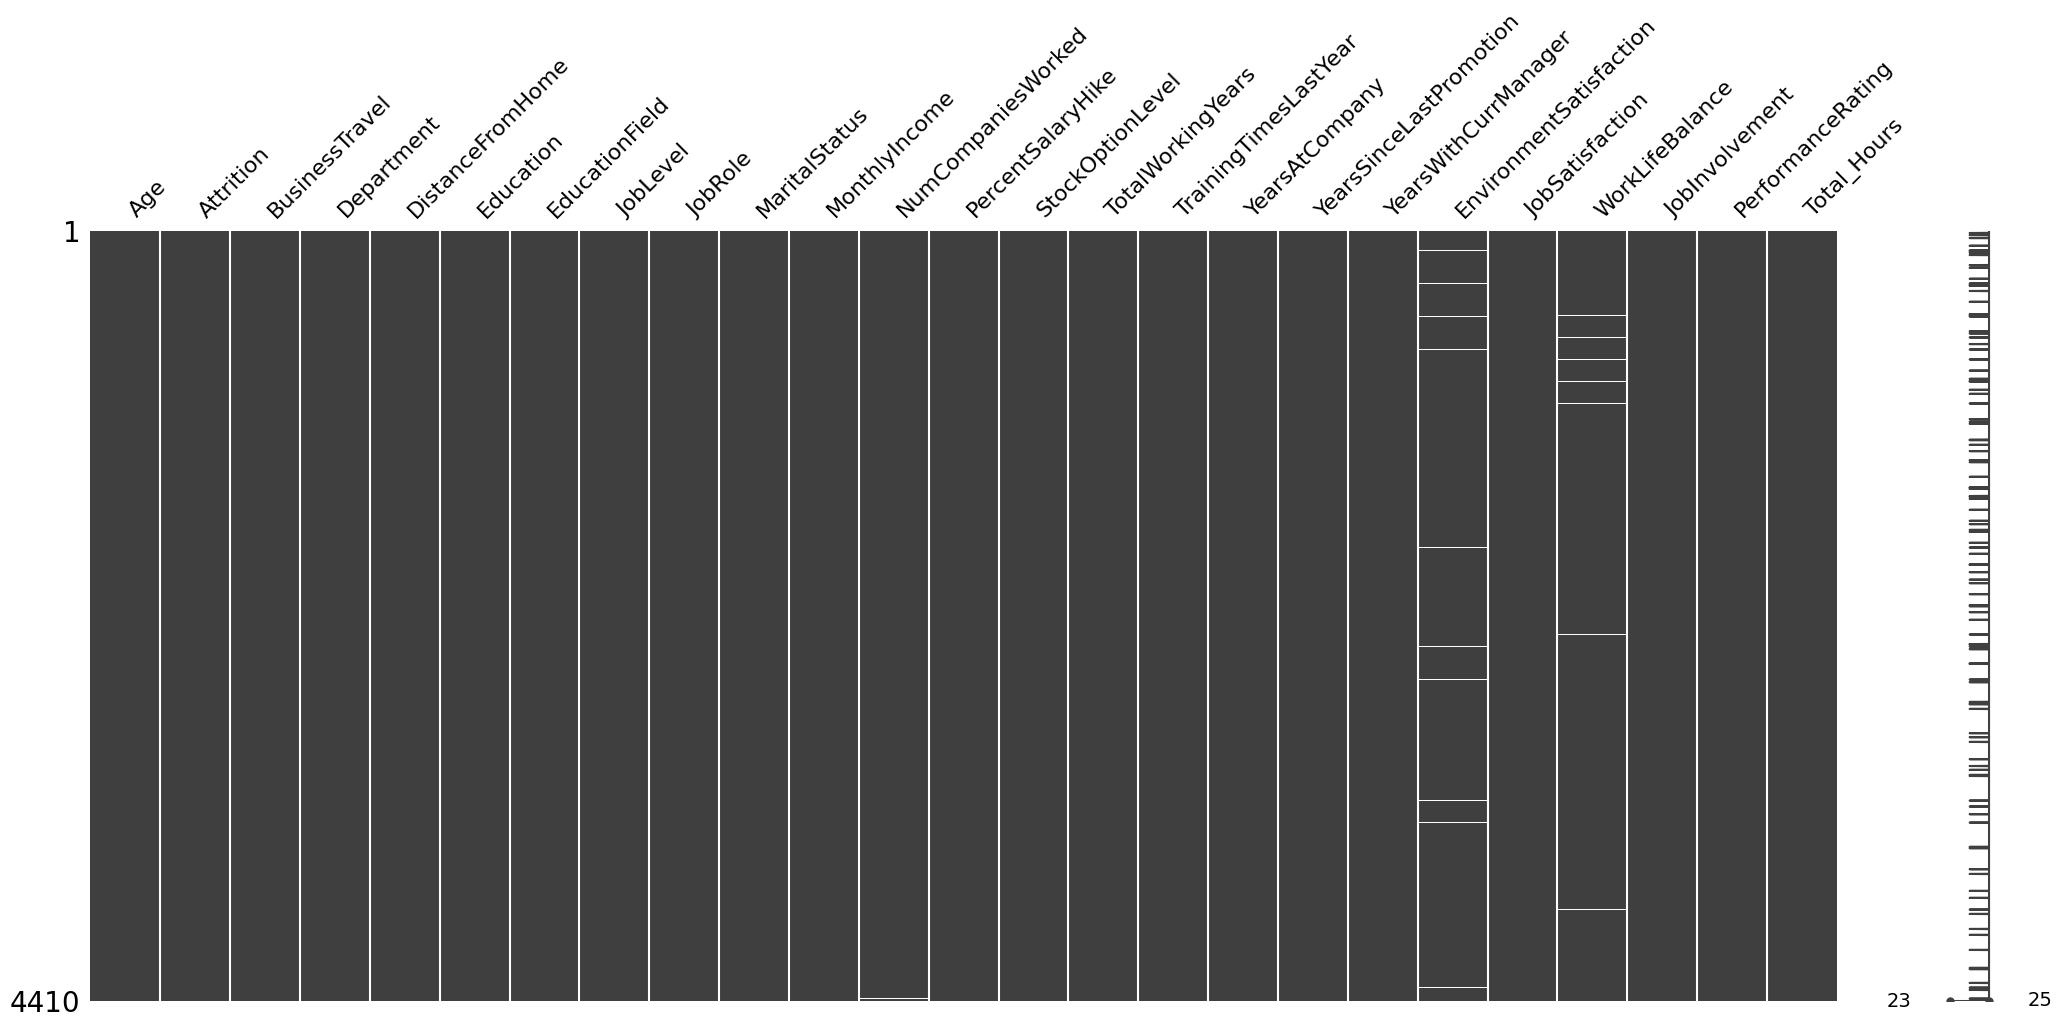

In [325]:
def check_missing_values(df):
    if (df.isnull().sum() > 0).any():
        missing_values = df.isnull().sum()[df.isnull().sum() > 0]
        print("Valeurs manquantes par colonne :")
        print(missing_values)
    else:
        print("Il n'y a pas de valeurs manquantes dans le dataset")
    msno.matrix(df)
    plt.show()


check_missing_values(company_df)

---

### 6. <a id='doublons'>Gestion des valeurs dupliquées</a>

In [326]:
def check_duplicates(df):
    if df.duplicated().sum() > 0:
        print(f"Nombre de valeurs dupliquées : {df.duplicated().sum()}")
        merged_dataset = df.drop_duplicates()
        print(f"Nombre de lignes après suppression des doublons : {merged_dataset.shape[0]}")
    else:
        print("Il n'y a pas de valeurs dupliquées dans le dataset")


check_duplicates(company_df)

Il n'y a pas de valeurs dupliquées dans le dataset


---

### 7. <a id='types'>Vérification des types de données</a>

In [327]:
#Valeurs numériques
numerical_columns = company_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

#Valeurs non numériques
categorical_columns = company_df.select_dtypes(include=['object','category']).columns
print(categorical_columns)

print(f"Nombre de colonnes traitées : {len(numerical_columns) + len(categorical_columns)}")
print(f"Nombre de colonnes dans le dataset : {company_df.shape[1]}")


Index(['DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Total_Hours'],
      dtype='object')
Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'JobRole', 'MaritalStatus'],
      dtype='object')
Nombre de colonnes traitées : 25
Nombre de colonnes dans le dataset : 25


---

### 8. <a id='pipeline'>Pipeline de traitement des données</a>

In [328]:
num_features = numerical_columns.tolist()
cat_features = categorical_columns.tolist()

# Pipeline pour les variables numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Pipeline pour les variables catégorielles
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline spécifique pour la colonne Attrition
attrition_pipeline = Pipeline([
    ('bool_transform', FunctionTransformer(lambda x: x == 'Yes', validate=False))
])

# Pipeline de preprocessing
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, [col for col in cat_features if col != 'Attrition']),
    ('cat_specific', attrition_pipeline, ['Attrition'])
])

# Appliquer la transformation sur les données d'origine
company_transformed_df = preprocessor.fit_transform(company_df)

cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_one_hot_columns = cat_encoder.get_feature_names_out([col for col in cat_features if col != 'Attrition']).tolist()

# Ajouter la colonne `Attrition` traitée
final_columns = num_features + cat_one_hot_columns + ['Attrition']

# Créer le DataFrame transformé
processed_df = pd.DataFrame(company_transformed_df, columns=final_columns)

# Afficher les premières lignes du DataFrame transformé
processed_df.head()


,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,6.0000,2.0000,1.0000,131160.0000,1.0000,11.0000,0.0000,1.0000,6.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,10.0000,1.0000,1.0000,41890.0000,0.0000,23.0000,1.0000,6.0000,3.0000,5.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
2,17.0000,4.0000,4.0000,193280.0000,1.0000,15.0000,3.0000,5.0000,2.0000,5.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,2.0000,5.0000,3.0000,83210.0000,3.0000,11.0000,3.0000,13.0000,5.0000,8.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,10.0000,1.0000,1.0000,23420.0000,4.0000,12.0000,2.0000,9.0000,2.0000,6.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000


On vient vérifier qu'il n'y a plus de valeurs manquantes dans le dataset :

Il n'y a pas de valeurs manquantes dans le dataset


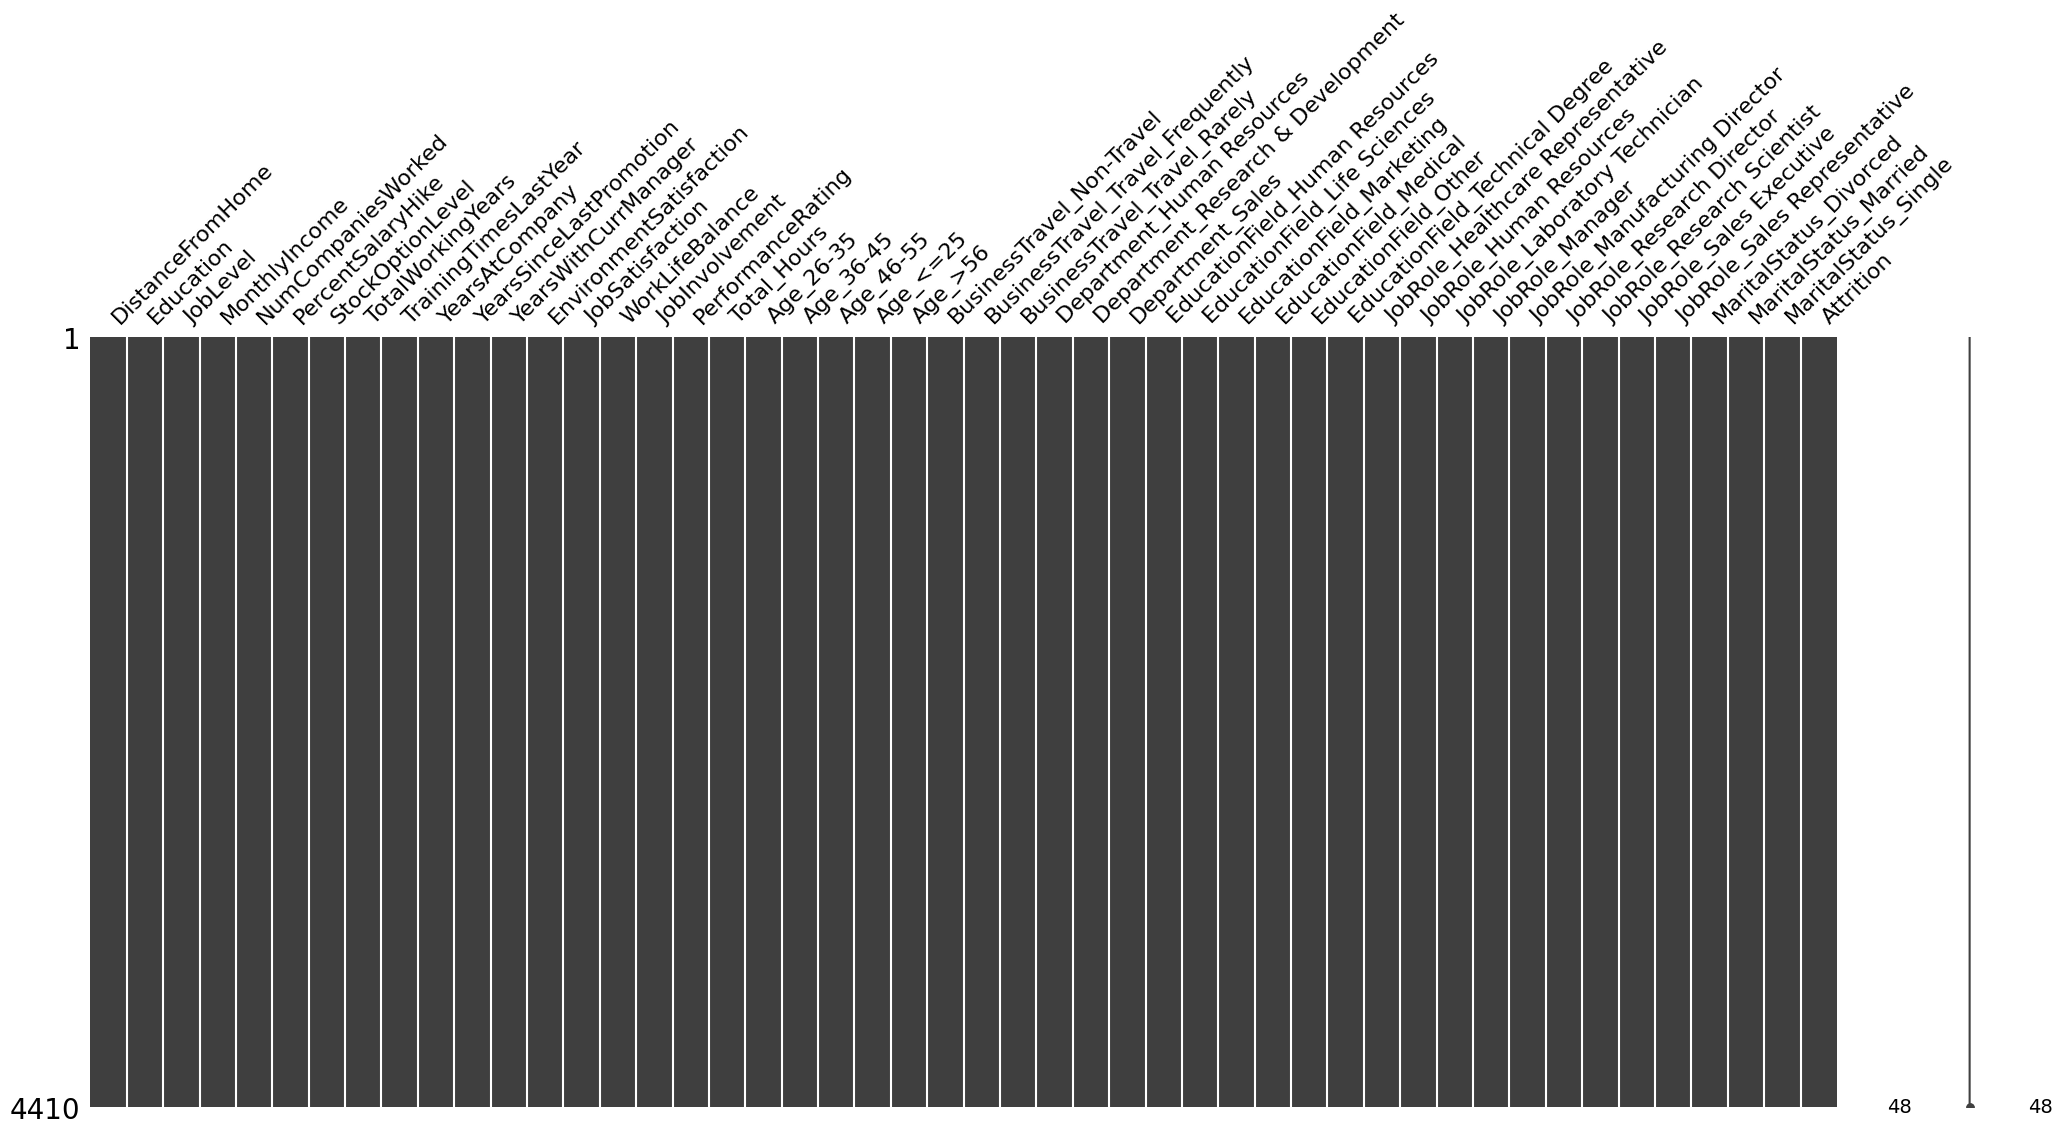

In [329]:
check_missing_values(processed_df)

**EDA** A présent, on va venir réaliser une analyse exploratoire des données pour mieux comprendre les différentes variables et leur impact sur l'attrition des employés.

In [330]:
# On vient récupérer les coefficients de corrélation de Pearson entre les différentes variables (relation linéaire)
correlation_matrix = processed_df.corr()
correlation_with_attrition = correlation_matrix['Attrition'].sort_values(ascending=False)

# Valeurs de corrélation avec la variable cible
print(correlation_with_attrition)

Attrition                            1.0000
Total_Hours                          0.1989
MaritalStatus_Single                 0.1754
Age_<=25                             0.1615
BusinessTravel_Travel_Frequently     0.1151
EducationField_Human Resources       0.0916
Department_Human Resources           0.0808
Age_26-35                            0.0688
JobRole_Research Director            0.0498
NumCompaniesWorked                   0.0421
PercentSalaryHike                    0.0325
JobRole_Research Scientist           0.0275
PerformanceRating                    0.0234
EducationField_Life Sciences         0.0124
JobRole_Sales Executive              0.0109
Age_>56                              0.0044
JobRole_Laboratory Technician        0.0012
EducationField_Medical               0.0008
EducationField_Marketing            -0.0038
StockOptionLevel                    -0.0068
DistanceFromHome                    -0.0097
JobLevel                            -0.0103
JobRole_Sales Representative    

On remarque que pour une approche linéaire, les variables les plus corrélées avec l'attrition sont : Total_Hours, MaritalStatus_Single, BusinessTravel_Travel_Frequently, EducationField_Human Resources, Department_Human Resources, JobRole_Research Director et NumCompaniesWorked


Cependant, il faut faire attention car il s'agit seulement des relations linéaires, il est possible que d'autres variables aient un impact sur l'attrition des employés.

### 7. <a id='doublons'>Ajout et choix des modèles</a>

Afin d'obtenir un résultat précis, on vient utiliser la classe StratifiedShuffleSplit pour obtenir des splits stratifiés. On va ensuite entraîner différents modèles de classification pour prédire l'attrition des employés.

In [331]:
def train_and_evaluate_model(models_selected, n_split):
    stratified_split = StratifiedShuffleSplit(n_splits=n_split, test_size=0.2, random_state=42)

    # Initialisation des dictionnaires pour stocker les résultats
    accuracies = {}
    roc_aucs = {}
    time_taken = {}

    # Initialisation des listes pour chaque modèle
    for model in models_selected:
        model_name = model.__class__.__name__
        print(f"Évaluation du modèle : {model_name}")
        accuracies[model_name] = []
        roc_aucs[model_name] = []
        time_taken[model_name] = []

    for train_index, test_index in stratified_split.split(processed_df, processed_df['Attrition']):
        strat_train_set = processed_df.loc[train_index]
        strat_test_set = processed_df.loc[test_index]

        data_train_set = strat_train_set.drop(['Attrition'], axis=1)
        data_labels = strat_train_set['Attrition'].copy()

        # Entraînement et évaluation de chaque modèle
        for model in models_selected:
            model_name = model.__class__.__name__

            start_time = time.time()
            model.fit(data_train_set, data_labels)
            end_time = time.time()

            y_tests = strat_test_set.drop(['Attrition'], axis=1)
            y_pred = model.predict(y_tests)
            y_proba = model.predict_proba(y_tests)[:,
                      1]

            # Évaluation des performances pour ce split
            accuracy = accuracy_score(strat_test_set['Attrition'], y_pred)
            roc_auc = roc_auc_score(strat_test_set['Attrition'], y_proba)

            accuracies[model_name].append(accuracy)
            roc_aucs[model_name].append(roc_auc)
            time_taken[model_name].append(end_time - start_time)

    # Création du DataFrame des résultats
    results_df = pd.DataFrame({
        'Model': list(accuracies.keys()),
        'Average Accuracy': [np.mean(acc) for acc in accuracies.values()],
        'Average ROC AUC': [sum(roc) / len(roc) for roc in roc_aucs.values()],
        'Average Time Taken (s)': [sum(time_t) / len(time_t) for time_t in time_taken.values()]
    })

    print("\nRésultats finaux :")
    return results_df



In [332]:
# Initialisation du modèle ExtraTreesClassifier
extra_tree_model = ExtraTreesClassifier(n_estimators=50)
logistic_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
pd.set_option('display.float_format', '{:.4f}'.format)

models = [extra_tree_model, logistic_model, rf_model]
train_and_evaluate_model(models, 5)

Évaluation du modèle : ExtraTreesClassifier
Évaluation du modèle : LogisticRegression
Évaluation du modèle : RandomForestClassifier

Résultats finaux :


,Model,Average Accuracy,Average ROC AUC,Average Time Taken (s)
0,ExtraTreesClassifier,0.9939,0.9999,0.2383
1,LogisticRegression,0.8397,0.7353,0.0566
2,RandomForestClassifier,0.9925,0.9993,0.6151


Pour avoir une autre idée, on peut utiliser la librairie Lazypredict qui permet de comparer rapidement les performances de plusieurs modèles de classification.

In [333]:
X = processed_df.drop('Attrition', axis=1)  # Les caractéristiques (features)
y = processed_df['Attrition']  # La variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_list, predictions = clf.fit(X_train, X_test, y_train, y_test)
models_list


100%|██████████| 32/32 [00:06<00:00,  5.16it/s]

[LightGBM] [Info] Number of positive: 570, number of negative: 2958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.9966,0.9894,0.9894,0.9966,0.5278
ExtraTreeClassifier,0.9909,0.9889,0.9889,0.9910,0.0325
LabelPropagation,0.9921,0.9838,0.9838,0.9921,1.3566
LabelSpreading,0.9921,0.9838,0.9838,0.9921,1.4489
RandomForestClassifier,0.9887,0.9645,0.9645,0.9885,0.6084
LGBMClassifier,0.9853,0.9625,0.9625,0.9851,0.1254
DecisionTreeClassifier,0.9615,0.9512,0.9512,0.9623,0.0748
BaggingClassifier,0.9819,0.9461,0.9461,0.9815,0.3504
SVC,0.9308,0.8038,0.8038,0.9250,0.4331


In [334]:
param_grids = {
    "ExtraTreesClassifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "RandomForestClassifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    }
}
best_params = {}
best_scores = {}

for model in models:
    model_name = model.__class__.__name__
    print(f"Recherche des meilleurs hyperparamètres pour {model_name}...")

    # GridSearchCV
    grid_search = GridSearchCV(
        model, param_grids[model_name],
        cv=2, scoring="accuracy", n_jobs=-1
    )

    grid_search.fit(X, y)


    print(f"Meilleurs paramètres pour {model_name} : {grid_search.best_params_}")
    print(f"Score (Accuracy) : {grid_search.best_score_:.4f}")



Recherche des meilleurs hyperparamètres pour ExtraTreesClassifier...
Meilleurs paramètres pour ExtraTreesClassifier : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Score (Accuracy) : 1.0000
Recherche des meilleurs hyperparamètres pour LogisticRegression...
Meilleurs paramètres pour LogisticRegression : {'C': 1, 'solver': 'lbfgs'}
Score (Accuracy) : 0.8451
Recherche des meilleurs hyperparamètres pour RandomForestClassifier...
Meilleurs paramètres pour RandomForestClassifier : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Score (Accuracy) : 0.9961


In [335]:
importances = extra_tree_model.feature_importances_
feature_importances = pd.Series(importances, index=final_columns[:-1])
feature_importances

DistanceFromHome                    0.0364
Education                           0.0308
JobLevel                            0.0286
MonthlyIncome                       0.0330
NumCompaniesWorked                  0.0317
PercentSalaryHike                   0.0358
StockOptionLevel                    0.0276
TotalWorkingYears                   0.0477
TrainingTimesLastYear               0.0294
YearsAtCompany                      0.0406
YearsSinceLastPromotion             0.0313
YearsWithCurrManager                0.0407
EnvironmentSatisfaction             0.0353
JobSatisfaction                     0.0384
WorkLifeBalance                     0.0322
JobInvolvement                      0.0315
PerformanceRating                   0.0132
Total_Hours                         0.0525
Age_26-35                           0.0178
Age_36-45                           0.0198
Age_46-55                           0.0110
Age_<=25                            0.0180
Age_>56                             0.0054
BusinessTra